In [1]:
import numpy as np
import scipy as sc
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime, date
import calendar
from time import ctime

In [2]:
#initia Conditions

Rs= 20              #in unit of solar radius
R0 = Rs*695700      # unit is Km
v0=1000            # unit is km/s
w=400              # which is ambient solar wind speed in unit of km/s 
Gamma=0.2
gamma=Gamma*10**(-7)  # unit is km-1
Time_UTC=datetime(2020,8,7,10,15,0)    #input utc time in format (year,month,date,hr,minute,second)


#Advance Drag based model parameter

Omega=30      # half angular width of CME in degree
Phi_target=20  # Earth-target heliocentric angular separation in degree 
Phi_CME=0     # source region central meridian distance in degree; shows shift of cme 

In [3]:
def dbm(x,t):
    r,v=x
    dxdt=[v,-gamma*(v-w)*np.abs(v-w)]
    return dxdt


ts = calendar.timegm(Time_UTC.timetuple())  #this command provide second correspond to given input time
t=np.arange(ts,ts+388000,1)

In [4]:
#we calculate speed and distance at alpha angle
def RV_alpha(omega,alpha):
    omega=np.deg2rad(omega)
    alpha=np.deg2rad(alpha)
    Y0=[R0,v0]
    Y=odeint(dbm,Y0,t)
    R=Y[:,0]/695700             # from now onwards we take solar radius as unit of distance
    V=Y[:,1]
    Ra=R *(np.cos(alpha) +((np.tan(omega))**2 - (np.sin(alpha))**2)**0.5)/(1+ np.tan(omega))
    Va= V *(np.cos(alpha) +((np.tan(omega))**2 - (np.sin(alpha))**2)**0.5)/(1+ np.tan(omega))
    
    return Ra,Va;

# Forecasting CME

In [5]:
def find_nearest(d,v, value):
    array = np.asarray(d)
    idx = (np.abs(array - value)).argmin()
    v=v[idx]
    T=(t[idx]-t[0])/3600
    T_Utc=datetime.utcfromtimestamp(t[idx])
    print("Transit time of CME is " + str(T) +" hr")
    print("Transit Speed of CME is " + str(v) + " km/s")
    print("Arrival time of CME in UTC is " +str(T_Utc))
    return idx


In [6]:
if Phi_CME-Omega < Phi_target < Phi_CME+Omega:
    print("Ohh no, CME hits the target.")
    alpha=np.abs(Phi_CME - Phi_target)
    R1=RV_alpha(Omega,alpha)[0]/215
    V1=RV_alpha(Omega,alpha)[1]
    A=find_nearest(R1,V1,1.0000)
    
else:
    print("Yeahh, CME misses the target")
    R1=RV_alpha(Omega,0)[0]/215
    V1=RV_alpha(Omega,0)[1]
    A=find_nearest(R1,V1,1.0000)

Ohh no, CME hits the target.
Transit time of CME is 61.815555555555555 hr
Transit Speed of CME is 501.8410475363479 km/s
Arrival time of CME in UTC is 2020-08-10 00:03:56


# CME Geometry

<ipython-input-7-bc43f7a26d33>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, projection='polar')


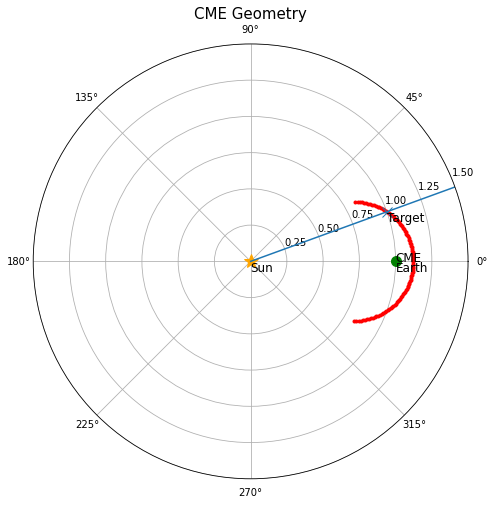

In [7]:
plt.figure(figsize=(10,8))
rads = np.arange(-2*np.pi,2* np.pi, 0.01) 

for rad in rads:
    if Phi_CME-Omega < np.rad2deg(rad) < Phi_CME+Omega:
        angle=np.abs(Phi_CME-np.rad2deg(rad))
        r=RV_alpha(Omega,angle)[0]
        q=r[A]/215
        ax = plt.subplot(111, projection='polar')
        ax.plot(rad, q,'r.')
        
    else:
        pass

    
    
ax.set_rticks([0.25,0.5,0.75,1,1.25,1.5])
ax.set_ylim(0,1.5)

ax.plot(0,0,"*",markersize=15,color='orange')
ax.text(0,0,"Sun",fontsize=12,va='top')

ax.plot(0,1,'o',markersize=10,color='green')
ax.text(0,1,"Earth",fontsize=12,va='top')

ax.plot(np.deg2rad(Phi_target),1,'x',markersize=10)
ax.text(np.deg2rad(Phi_target),1,"Target",fontsize=12,va='top')
ax.axvline(np.deg2rad(Phi_target))

ax.text(np.deg2rad(Phi_CME),1,"CME",fontsize=12)


ax.set_title("CME Geometry",fontsize=15)
plt.show()